In [268]:
import numpy as np
import pandas as pd
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import numpy as np

In [269]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [270]:
train_df['loan_status'].value_counts()

low_risk     6090
high_risk    6090
Name: loan_status, dtype: int64

In [271]:
# dropped target from train

In [272]:
X_train = train_df.drop('loan_status', axis=1)
X_train

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,n,29.99,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,n,11.26,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,n,11.28,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,n,18.08,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,n,27.77,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,354912,354912,19975.0,0.2565,801.09,RENT,28000.0,Not Verified,n,28.42,...,100.0,16.7,0.0,0.0,50055.0,28192.0,18700.0,19055.0,N,N
12176,354944,354944,15000.0,0.1774,540.34,RENT,50000.0,Verified,n,23.43,...,90.5,11.1,0.0,0.0,70324.0,57025.0,13300.0,54824.0,N,N
12177,354973,354973,3600.0,0.1862,131.28,RENT,60000.0,Not Verified,n,28.80,...,100.0,0.0,0.0,0.0,83765.0,55156.0,14800.0,53065.0,N,N
12178,355002,355002,15000.0,0.0881,475.68,MORTGAGE,62000.0,Source Verified,n,11.44,...,100.0,0.0,0.0,0.0,189930.0,23748.0,7000.0,32930.0,N,N


In [273]:
# check dropped row (next could should flag error)

In [276]:
X_train.compare(other=train_df)

ValueError: Can only compare identically-labeled DataFrame objects

In [277]:
# check row sum for comparison to post dummy encoding

In [278]:
# 85 columns total

In [279]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12180 entries, 0 to 12179
Data columns (total 85 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  12180 non-null  int64  
 1   index                       12180 non-null  int64  
 2   loan_amnt                   12180 non-null  float64
 3   int_rate                    12180 non-null  float64
 4   installment                 12180 non-null  float64
 5   home_ownership              12180 non-null  object 
 6   annual_inc                  12180 non-null  float64
 7   verification_status         12180 non-null  object 
 8   pymnt_plan                  12180 non-null  object 
 9   dti                         12180 non-null  float64
 10  delinq_2yrs                 12180 non-null  float64
 11  inq_last_6mths              12180 non-null  float64
 12  open_acc                    12180 non-null  float64
 13  pub_rec                     121

In [280]:
# encoded category data into binary (boolean) for model improvement {pre processing}

In [281]:
# 94 is new total after encoding category columns

In [282]:
# Convert categorical data to numeric and separate target feature for training data
X_train = pd.get_dummies(X)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12180 entries, 0 to 12179
Data columns (total 94 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           12180 non-null  int64  
 1   index                                12180 non-null  int64  
 2   loan_amnt                            12180 non-null  float64
 3   int_rate                             12180 non-null  float64
 4   installment                          12180 non-null  float64
 5   annual_inc                           12180 non-null  float64
 6   dti                                  12180 non-null  float64
 7   delinq_2yrs                          12180 non-null  float64
 8   inq_last_6mths                       12180 non-null  float64
 9   open_acc                             12180 non-null  float64
 10  pub_rec                              12180 non-null  float64
 11  revol_bal                   

In [283]:
# label encode loan status (high risk vs low risk) in target 

In [322]:
y_train = LabelEncoder().fit_transform(train_df['loan_status'])
y_train

array([1, 1, 1, ..., 0, 0, 0])

In [313]:
# y_train = (train_df['loan_status'])
# y_train

In [286]:
# Convert categorical data to numeric and separate target feature for testing data

In [287]:
X_test = test_df.drop('loan_status', axis=1)
X_test

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,67991,67991,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,n,19.75,...,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,25429,25429,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,n,11.52,...,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,38496,38496,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,n,6.74,...,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,19667,19667,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,n,12.13,...,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,37505,37505,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,n,16.08,...,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,77282,77282,30000.0,0.1240,673.42,RENT,140480.0,Source Verified,n,15.74,...,100.0,28.6,0.0,0.0,159688.0,110873.0,48400.0,107388.0,N,N
4698,77291,77291,24000.0,0.0756,747.22,RENT,50000.0,Not Verified,n,26.81,...,100.0,0.0,0.0,0.0,62375.0,18928.0,13300.0,30775.0,N,N
4699,77292,77292,10000.0,0.2305,387.36,RENT,33000.0,Verified,n,38.51,...,100.0,0.0,0.0,0.0,43250.0,33022.0,8500.0,29550.0,N,N
4700,77297,77297,8000.0,0.1862,205.86,RENT,38000.0,Source Verified,n,16.36,...,95.0,0.0,1.0,0.0,31357.0,19595.0,1500.0,9657.0,N,N


In [289]:
# Convert categorical data to numeric and separate target feature for training data
X_test = pd.get_dummies(X_test)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4702 entries, 0 to 4701
Data columns (total 93 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           4702 non-null   int64  
 1   index                                4702 non-null   int64  
 2   loan_amnt                            4702 non-null   float64
 3   int_rate                             4702 non-null   float64
 4   installment                          4702 non-null   float64
 5   annual_inc                           4702 non-null   float64
 6   dti                                  4702 non-null   float64
 7   delinq_2yrs                          4702 non-null   float64
 8   inq_last_6mths                       4702 non-null   float64
 9   open_acc                             4702 non-null   float64
 10  pub_rec                              4702 non-null   float64
 11  revol_bal                     

In [321]:
y_test = LabelEncoder().fit_transform(test_df['loan_status'])
y_test

array([1, 1, 1, ..., 0, 0, 0])

In [312]:
# y_test = test_df['loan_status']
# y_test

In [293]:
# add missing dummy variables to testing set

In [294]:
# noticed that total columns on test was 93 after encoding so missing 1 column from train data set!!??

In [295]:
dummy_variable = []
dummy_variable2 = []

for i in X_train.columns:
    for j in X_test.columns:
        if i != j:
            dummy_variable.append(i)
            dummy_variable2.append(j)

dummy_variable = pd.DataFrame(dummy_variable)

dummy_variable2 = pd.DataFrame(dummy_variable2)

In [296]:
dummy_variable.value_counts()

debt_settlement_flag_Y          93
Unnamed: 0                      92
pub_rec_bankruptcies            92
policy_code                     92
percent_bc_gt_75                92
                                ..
inq_last_6mths                  92
inq_last_12m                    92
inq_fi                          92
initial_list_status_w           92
verification_status_Verified    92
Length: 94, dtype: int64

In [297]:
dummy_variable2.value_counts()

Unnamed: 0                      93
open_act_il                     93
policy_code                     93
percent_bc_gt_75                93
pct_tl_nvr_dlq                  93
                                ..
inq_last_6mths                  93
inq_last_12m                    93
inq_fi                          93
initial_list_status_w           93
verification_status_Verified    93
Length: 93, dtype: int64

In [298]:
# looks like debt_settle...... was the culprit (see first line in dummy_variable.value_counts output)

In [300]:
# adding column to test set to avoid hiccups with model. input new column with all values at 0

In [301]:
# X_train['debt_settlement_flag_Y']
X_test['debt_settlement_flag_Y'] = 0

In [302]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [334]:
def CMatrix(CM, labels = ['low', 'HIGH']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name='Actual'
    df.columns.name='Prediction'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df
    

In [335]:
metrics = pd.DataFrame(index=['accuracy', 'precision', 'recall'],columns=['NULL', 'LogisticReg', 'RandomForest'])

# Metrics
---
* Accuracy: the proportion of the total number of predictions that are correct
* Precision: the proportion of positive predictions that are actually correct
* Recall: the proportion of total positives predicted
---
* Accuracy: Overall how often the model predicts correctly HIGH_RISK vs. low_risk
* Precision: how often the model predicts an ouput as correct (True Positives / True Positives + False Positives)
* Recall: total predictions given as correct (True Positives / True Positives + False Negatives)
---
* False Positive = A person that will be predicted as HIGH_RISK but is actually low_risk (eh..)
* False Negative = A person that will be predicted as low_risk but is actually HIGH_RISK (very bad!!!)

In [336]:
import numpy as np

In [337]:
y_train = pd.DataFrame(y_train)

In [338]:
y_pred_test = pd.np.repeat(y_train.value_counts().idxmax(), y_test.size)
metrics.loc['accuracy', 'NULL'] = accuracy_score(y_pred = y_pred_test, y_true = y_test)
metrics.loc['precision', 'NULL'] = precision_score(y_pred = y_pred_test, y_true = y_test)
metrics.loc['recall', 'NULL'] = recall_score(y_pred = y_pred_test, y_true = y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

Prediction,low,HIGH,Total
Actual,,,
low,2351,0,2351
HIGH,2351,0,2351
Total,4702,0,4702


# Pre-scale Prediction

---

* I'm pretty sure that the models will not perform as well as they will with scaled data.
* Mainly because the numerical scales of the integer data is vary far apart and concentrated in those distances

In [339]:
# Train the Logistic Regression model on the unscaled data and print the model score
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(n_jobs=-1, random_state=15)
logistic_regression.fit(X_train,y_train)

y_pred_test = logistic_regression.predict(X_test)

metrics.loc['accuracy', 'LogisticReg'] = accuracy_score(y_pred = y_pred_test, y_true = y_test)
metrics.loc['precision', 'LogisticReg'] = precision_score(y_pred = y_pred_test, y_true = y_test)
metrics.loc['recall', 'LogisticReg'] = recall_score(y_pred = y_pred_test, y_true = y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

Prediction,low,HIGH,Total
Actual,,,
low,526,1825,2351
HIGH,408,1943,2351
Total,934,3768,4702


In [340]:
# Train a Random Forest Classifier model and print the model score

In [341]:
# Import a Random Forests classifier
from sklearn.ensemble import RandomForestClassifier

In [342]:
class_tree = RandomForestClassifier(min_samples_split=30, min_samples_leaf=10, random_state=10)

class_tree.fit(X_train, y_train)

y_pred_test = class_tree.predict(X_test)
metrics.loc['accuracy', 'RandomForest'] = accuracy_score(y_pred = y_pred_test, y_true = y_test)
metrics.loc['precision', 'RandomForest'] = precision_score(y_pred = y_pred_test, y_true = y_test)
metrics.loc['recall', 'RandomForest'] = recall_score(y_pred = y_pred_test, y_true = y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

Prediction,low,HIGH,Total
Actual,,,
low,661,1690,2351
HIGH,196,2155,2351
Total,857,3845,4702


In [343]:
import matplotlib.pyplot as plt
%matplotlib inline

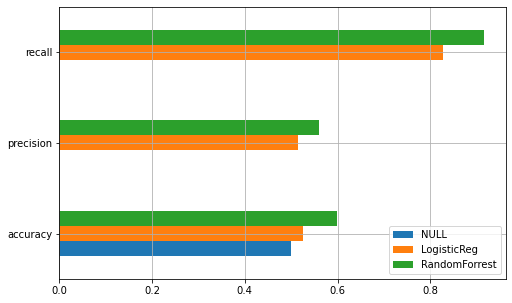

In [344]:
fig, ax = plt.subplots(figsize=(8,5))
metrics.plot(kind='barh', ax=ax)
ax.grid();

In [345]:
# RandomForest leading by a high margin. lets see how it does after scaling

In [346]:
# Scale the data

In [347]:
scaler = RobustScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.78097654, -0.78097654, -0.10833333, ...,  0.        ,
         0.        ,  0.        ],
       [-0.28578642, -0.28578642,  0.4       , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.76919916,  0.76919916,  0.33333333, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.96781769,  0.96781769, -0.76      , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.96798795,  0.96798795,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.96977863,  0.96977863,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [348]:
scaler = RobustScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.69460717,  0.69460717,  1.72562554, ...,  0.        ,
         0.        ,  0.        ],
       [-0.44393173, -0.44393173, -0.62122519, ...,  0.        ,
         0.        ,  0.        ],
       [-0.09438782, -0.09438782, -0.78688525, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.94341011,  0.94341011, -0.34512511, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.94354386,  0.94354386, -0.48317515, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.94373111,  0.94373111,  1.03537532, ...,  0.        ,
         0.        ,  0.        ]])

In [349]:
# Train the Logistic Regression model on the scaled data and print the model score

In [ ]:
metrics2 = pd.DataFrame(index=['accuracy', 'precision', 'recall'],columns=['NULL', 'LogisticRegScaled', 'RandomForrestScaled'])

In [351]:
logistic_regression = LogisticRegression(n_jobs=-1, random_state=15)
logistic_regression.fit(X_train_scaled,y_train)

y_pred_test = logistic_regression.predict(X_test_scaled)

metrics.loc['accuracy', 'LogisticReg'] = accuracy_score(y_pred = y_pred_test, y_true = y_test)
metrics.loc['precision', 'LogisticReg'] = precision_score(y_pred = y_pred_test, y_true = y_test)
metrics.loc['recall', 'LogisticReg'] = recall_score(y_pred = y_pred_test, y_true = y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

Prediction,low,HIGH,Total
Actual,,,
low,1497,854,2351
HIGH,809,1542,2351
Total,2306,2396,4702


In [340]:
# Train a Random Forest Classifier model and print the model score

In [352]:
class_tree = RandomForestClassifier(min_samples_split=30, min_samples_leaf=10, random_state=10)

class_tree.fit(X_train_scaled, y_train)

y_pred_test = class_tree.predict(X_test_scaled)
metrics.loc['accuracy', 'RandomForest'] = accuracy_score(y_pred = y_pred_test, y_true = y_test)
metrics.loc['precision', 'RandomForest'] = precision_score(y_pred = y_pred_test, y_true = y_test)
metrics.loc['recall', 'RandomForest'] = recall_score(y_pred = y_pred_test, y_true = y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

Prediction,low,HIGH,Total
Actual,,,
low,1734,617,2351
HIGH,656,1695,2351
Total,2390,2312,4702


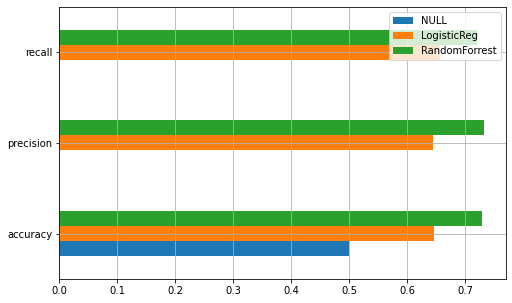

In [353]:
fig, ax = plt.subplots(figsize=(8,5))
metrics.plot(kind='barh', ax=ax)
ax.grid();

In [354]:
# crazy improvements for both models after scaling the data more true negatives and true positives on both models

In [355]:
# random forest still wins by a landslide though